<a href="https://colab.research.google.com/github/malinphy/hate_speech/blob/main/hate_speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn  as sns
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [2]:
url = 'https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv'

df = pd.read_csv(url)

 

In [3]:
df.head(3)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


plt.hist(df['hate_speech'])

plt.hist(df['count'])

plt.hist(df['offensive_language'])

In [5]:
tweets_mali = df['tweet'].copy()
tweets = df.tweet

In [6]:
def word_counter(x):
    
    splitter = []
    for i in x:
        var1 = i.split()
        for j in var1:
            splitter.append(j)
            
    word_number_count = Counter(splitter).most_common()
    
    words = []
    words_number = []
    
    for i in word_number_count:
        words.append(i[0])
        words_number.append(i[1])
    
    
    words = words[0:50]
    words_number = words_number[0:50]
    return words,words_number

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

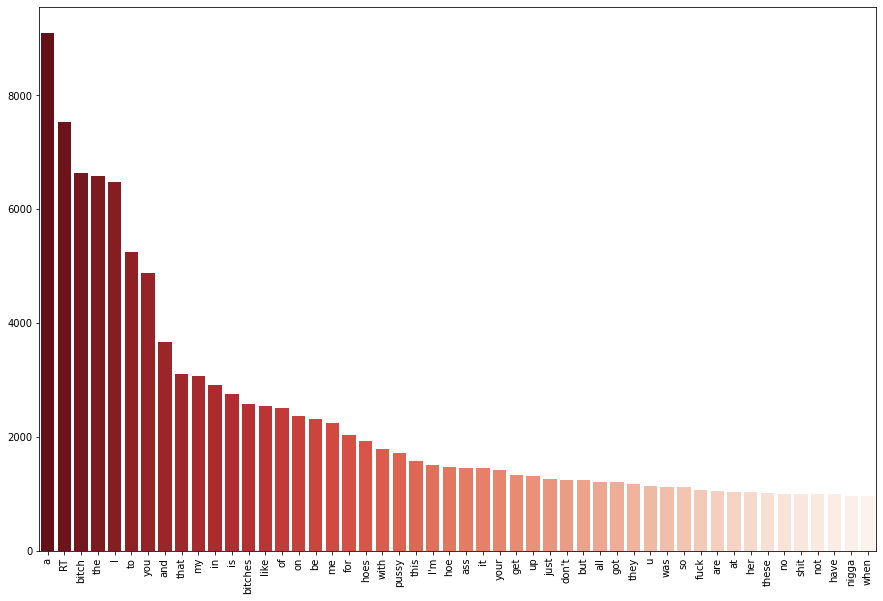

In [7]:
X,y = word_counter(tweets)
plt.figure(figsize=(15,10))
sns.barplot(X,y, palette="Reds_r")
plt.xticks(rotation=90)
plt.show

In [8]:
numberOfWords = [] 

for i in range(len(tweets)):
    x = len(tweets_mali[i].split())
    numberOfWords.append(x)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sample length distribution')

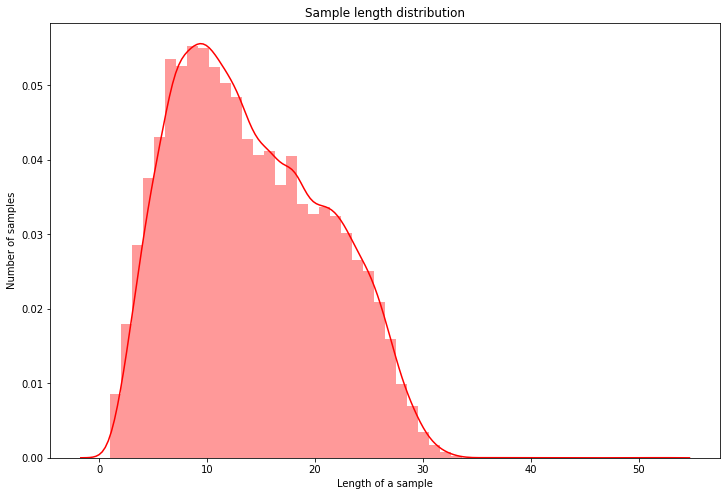

In [9]:
plt.figure(figsize=(12,8))
sns.distplot(numberOfWords, 50  , color="red")
plt.xlabel('Length of a sample')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
#plt.xlim([-100,6000])

In [10]:
for i in range(len(tweets)):
    tweets_mali[i] = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', tweets_mali[i]) # regex command to strip url links
    tweets_mali[i] = re.sub('\s+', ' ',tweets_mali[i]) # regex command to rearrange space pattern
    tweets_mali[i] = re.sub('@[\w\-]+','',tweets_mali[i]) # regex command to strip the mentions 
    
    RT_pattern = []
    
for i in range(len(tweets)):
    x = re.findall(":",tweets_mali[i])
    if x == [':']:
        RT_pattern.append(i)
    
for i in (RT_pattern):
    # regex command to strip the RT!! pattern
    tweets_mali[i] = re.split(":",tweets_mali[i])[1]
    
for i in range (len(tweets)):
    tweets_mali[i] = re.sub("!|@|[.]|:|,|[0-9]|#|&|;|[|]|[\"]", "",tweets_mali[i])
    tweets_mali[i] = tweets_mali[i].lower()
    #tweets_mali[i] = re.sub("[0-9],",tweets_mali[i]")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

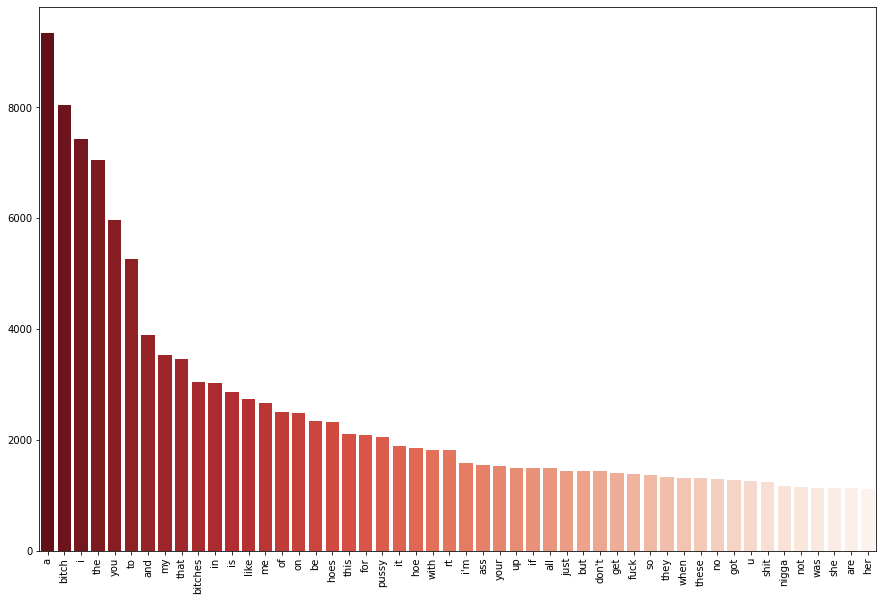

In [11]:
X_clean,y_clean = word_counter(tweets_mali)

plt.figure(figsize=(15,10))
sns.barplot(X_clean,y_clean, palette="Reds_r")
plt.xticks(rotation=90)
plt.show

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


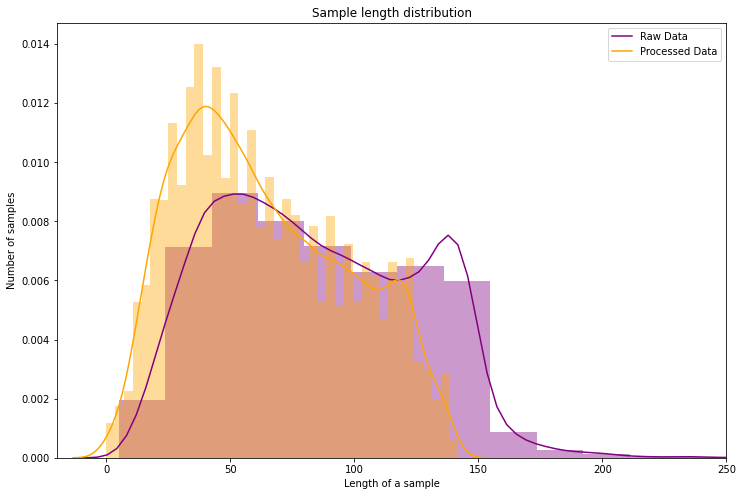

In [12]:
## BU FONKSIYONDA MEAN DEGERLERINI HESAPLAMAK GEREK DAHA SONRA HESAPLANAN MEAN DEGERLERIYLE GRAFIKTEN ELDE EDILEN 
## PEAK DEGERLERININ YAKINLIGINI KARSILASTIR.


plt.figure(figsize=(12,8))
sns.distplot([len(s) for s in tweets], 40  , color="purple")
sns.distplot([len(a) for a in tweets_mali], 40  , color="orange")
plt.xlabel('Length of a sample')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.xlim([-20,250])
plt.legend(['Raw Data','Processed Data'])

In [13]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
tweets_mali_tokenizer  = Tokenizer()
tweets_mali_tokenizer.fit_on_texts(tweets_mali)
tweets_mali_word_index = tweets_mali_tokenizer.word_index

In [15]:
len(tweets_mali_word_index)

21570

In [16]:
tweets_mali_token_sequence = tweets_mali_tokenizer.texts_to_sequences(tweets_mali)

In [17]:
tweets_mali_padded  = pad_sequences(tweets_mali_token_sequence, padding='post')

In [18]:
tweets_mali_padded.shape

(24783, 33)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train, y_test = train_test_split (tweets_mali_padded, 
                                                   df['class'], 
                                                   train_size = 0.8 , 
                                                   random_state=42)

In [21]:
tweets_model = tf.keras.Sequential([
    tf.keras.layers.Dense (1024*4, activation = 'relu'),
    tf.keras.layers.Dense (1024, activation = 'relu'),
    tf.keras.layers.Dense (512,activation = 'relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

In [22]:
tweets_model.compile(loss= 'binary_crossentropy',
              optimizer= 'adam',
              metrics = ['accuracy'])

In [23]:
df['class'].unique()

array([2, 1, 0])

In [28]:
mali_nn_model=tweets_model.fit(X_train,y_train,epochs=50 )

Epoch 1/50
620/620 [==============================] - 2s 3ms/step - loss: 10.8059 - accuracy: 0.7723
Epoch 2/50
620/620 [==============================] - 2s 3ms/step - loss: 10.8059 - accuracy: 0.7726
Epoch 3/50
620/620 [==============================] - 2s 3ms/step - loss: 10.8059 - accuracy: 0.7731
Epoch 4/50
620/620 [==============================] - 2s 3ms/step - loss: 10.8059 - accuracy: 0.7737
Epoch 5/50
620/620 [==============================] - 2s 3ms/step - loss: 10.8059 - accuracy: 0.7729
Epoch 6/50
620/620 [==============================] - 2s 3ms/step - loss: 10.8059 - accuracy: 0.7725
Epoch 7/50
620/620 [==============================] - 2s 3ms/step - loss: 10.8059 - accuracy: 0.7732
Epoch 8/50
620/620 [==============================] - 2s 3ms/step - loss: 10.8059 - accuracy: 0.7733
Epoch 9/50
620/620 [==============================] - 2s 3ms/step - loss: 10.8059 - accuracy: 0.7728
Epoch 10/50
620/620 [==============================] - 2s 3ms/step - loss: 10.8059 - accura

In [29]:
mali_nn_model.history.keys()

dict_keys(['loss', 'accuracy'])

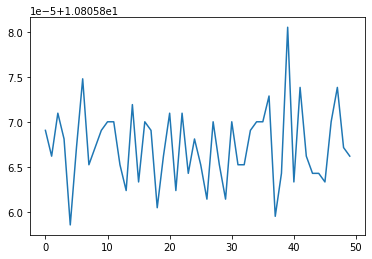

In [30]:
plt.plot(mali_nn_model.history['loss'])

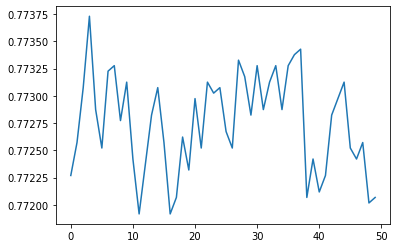

In [31]:
plt.plot(mali_nn_model.history['accuracy'])